In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [50]:

# read the image file 
img = cv2.imread('image_constrasto.png', 2) 

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
contrast_img = clahe.apply(img)
blurred_img = cv2.GaussianBlur(img, (7, 7), 0)
ret, bw_img = cv2.threshold(blurred_img, 140, 255, cv2.THRESH_BINARY) 
  
# converting to its binary form 
bw = cv2.threshold(blurred_img, 170, 255, cv2.THRESH_BINARY) 
  
cv2.imwrite('binary_image.png', bw_img)

True

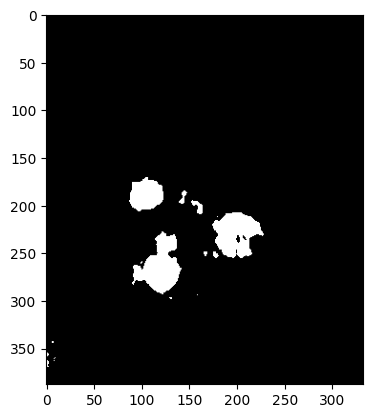

In [51]:
bw_img = bw_img[:,100:]
plt.imshow(bw_img, cmap='gray')

In [52]:
contours, _ = cv2.findContours(bw_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)[:3]
# Extract the largest contour (assuming it's the region of interest)
# contour = max(contours, key=cv2.contourArea)

# # Extract the points from the contour
# points = contour.squeeze()

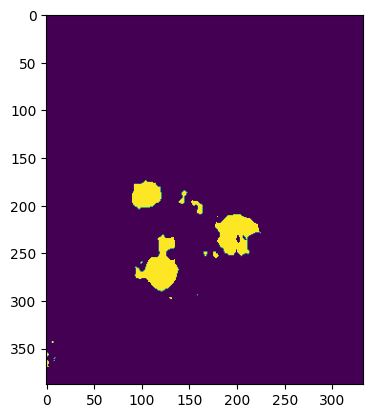

In [53]:
contour_img = bw_img.copy()
cv2.drawContours(contour_img, sorted_contours, -1, (0, 255, 0), 2)
plt.imshow(contour_img)


In [54]:
height, width = bw_img.shape
flipped_contours = []
for contour in sorted_contours:
    flipped_contour = []
    for point in contour:
        x, y = point[0]
        flipped_contour.append([x, height - y])  # Flip y-coordinate
    flipped_contours.append(np.array(flipped_contour, dtype=np.float32))


In [55]:
hole1 = flipped_contours[0].squeeze()
hole2 = flipped_contours[1].squeeze()
hole3 = flipped_contours[2].squeeze()
hole1 = hole1/100
hole2 = hole2/100
hole3 = hole3/100

In [56]:
import gmsh

# Initialize Gmsh
gmsh.initialize()
# gmsh.model.add("mesh_from_image")

lc = 0.1
radius_outer = 2
outer_point1 = gmsh.model.geo.addPoint(1, 2, 0, lc)
outer_point2 = gmsh.model.geo.addPoint(1+radius_outer, 2, 0, lc)
outer_point3 = gmsh.model.geo.addPoint(1-radius_outer, 2, 0, lc)
outer_circle1 = gmsh.model.geo.addCircleArc(outer_point2, outer_point1, outer_point3)
outer_circle2 = gmsh.model.geo.addCircleArc(outer_point3, outer_point1, outer_point2)
outer_loop = gmsh.model.geo.addCurveLoop([outer_circle1, outer_circle2])

# Add points to Gmsh
point_tags1 = []
for i, point in enumerate(hole1):
    point_tags1.append(gmsh.model.geo.addPoint(point[0], point[1], 0, 1))

# Add lines between points
line_tags1 = []
for i in range(len(point_tags1)):
    line_tags1.append(gmsh.model.geo.addLine(point_tags1[i], point_tags1[(i + 1) % len(point_tags1)]))

# Create a curve loop from the lines
curve_loop1 = gmsh.model.geo.addCurveLoop(line_tags1)

point_tags2 = []
for i, point in enumerate(hole2):
    point_tags2.append(gmsh.model.geo.addPoint(point[0], point[1], 0, 1))

# Add lines between points
line_tags2 = []
for i in range(len(point_tags2)):
    line_tags2.append(gmsh.model.geo.addLine(point_tags2[i], point_tags2[(i + 1) % len(point_tags2)]))

# Create a curve loop from the lines
curve_loop2 = gmsh.model.geo.addCurveLoop(line_tags2)

point_tags3 = []
for i, point in enumerate(hole3):
    point_tags3.append(gmsh.model.geo.addPoint(point[0], point[1], 0, 1))

# Add lines between points
line_tags3 = []
for i in range(len(point_tags3)):
    line_tags3.append(gmsh.model.geo.addLine(point_tags3[i], point_tags3[(i + 1) % len(point_tags3)]))

# Create a curve loop from the lines
curve_loop3 = gmsh.model.geo.addCurveLoop(line_tags3)

# Create a surface from the curve loop
surface_tag = gmsh.model.geo.addPlaneSurface([outer_loop,-curve_loop1,-curve_loop2, -curve_loop3])

# add physical groups
gmsh.model.geo.addPhysicalGroup(1, [outer_circle1,outer_circle2], 1)
gmsh.model.geo.addPhysicalGroup(1, line_tags1, 2)
gmsh.model.geo.addPhysicalGroup(1, line_tags2, 3)
gmsh.model.geo.addPhysicalGroup(1, line_tags3, 4)
gmsh.model.geo.addPhysicalGroup(2, [surface_tag], 5)


# Synchronize the Gmsh model
gmsh.model.geo.synchronize()

# Generate the mesh for the surface
gmsh.model.mesh.generate(2)
gmsh.option.setNumber("Mesh.MshFileVersion",2.2)

# Save the mesh to a file
gmsh.write("mesh_from_image.msh")
gmsh.fltk.run()

# Finalize Gmsh
gmsh.finalize()


Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Circle)
Info    : [ 10%] Meshing curve 2 (Circle)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 10%] Meshing curve 4 (Line)
Info    : [ 10%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 7 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 10%] Meshing curve 11 (Line)
Info    : [ 10%] Meshing curve 12 (Line)
Info    : [ 10%] Meshing curve 13 (Line)
Info    : [ 10%] Meshing curve 14 (Line)
Info    : [ 10%] Meshing curve 15 (Line)
Info    : [ 10%] Meshing curve 16 (Line)
Info    : [ 10%] Meshing curve 17 (Line)
Info    : [ 10%] Meshing curve 18 (Line)
Info    : [ 10%] Meshing curve 19 (Line)
Info    : [ 10%] Meshing curve 20 (Line)
Info    : [ 10%] Meshing curve 21 (Line)
Info    : [ 10%] Meshing curve 22 (Line)
Info    : [ 10%] Meshing curve 23 (Line)
Info    : [ 10%] Meshing curve 24 (Lin